# Proyek Analisis Data: order_payments_dataset
- Nama: gustana
- Email: gustana.satiawan@gmail.com
- Id Dicoding: gustana

## Menentukan Pertanyaan Bisnis

- what is the most used payment type?
- how much payment value has been processed for each payment type?
- how is the distribution of payment type on payment value vs payment installment?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import math

## Data Wrangling

### Gathering Data

In [2]:
# global variable
DS_PATH = '/content/order_payments_dataset.csv'

In [3]:
order_payment = pd.read_csv(DS_PATH, quoting=csv.QUOTE_NONE)
order_payment.head()

,"""order_id""","""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8.0,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1.0,24.39
2,"""25e8ea4e93396b6fa0d3dd708e76c1bd""",1,credit_card,1.0,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8.0,107.78
4,"""42fdf880ba16b47b59251dd489d4441a""",1,credit_card,2.0,128.45


### Assessing Data

In [4]:
data = order_payment.copy()

#### inspect data type for each column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37697 entries, 0 to 37696
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   "order_id"              37697 non-null  object 
 1   "payment_sequential"    37697 non-null  int64  
 2   "payment_type"          37697 non-null  object 
 3   "payment_installments"  37696 non-null  float64
 4   "payment_value"         37696 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.4+ MB


> It looks like the data type is suitable for each column

#### inspect duplicated values

In [6]:
# inspect dupliaced value for all columns
print(data.duplicated().sum())

# inspect duplicated value for order_id
print(data.duplicated(subset=['"order_id"']).sum())

# inspect dupliaced value for all columns except order_id
print(data.loc[:,data.columns != '"order_id"'].duplicated().sum())

0
766
8853


The inspection above shows 2 interesting information:
- There are 4,446 duplicated `order_id` in dataset
- There are 39,869 duplicated observations for `all columns except order_id`

In [7]:
data[data.duplicated(subset=['"order_id"'])]

,"""order_id""","""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
1456,"""683bf306149bb869980b68d48a1bd6ab""",1,credit_card,1.0,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1.0,10.51
2393,"""8e5148bee82a7e42c5f9ba76161dc51a""",1,credit_card,1.0,0.67
2414,"""816ccd9d21435796e8ffa9802b2a782f""",1,credit_card,1.0,5.65
2497,"""2cbcb371aee438c59b722a21d83597e0""",2,voucher,1.0,7.80
...,...,...,...,...,...
37637,c6b0115592f584f15795ca244bd83fb2,2,voucher,1.0,100.00
37649,e1320973675a5fc37fab54cb22c582ab,2,voucher,1.0,83.83
37651,"""7489466aa2aad065d81a6b70e516a562""",2,voucher,1.0,50.00
37682,"""436a9aef30267664e39faf27982b0921""",2,voucher,1.0,85.72


In [8]:
data[data['"order_id"']=='e6a66a8350bb88497954d37688ab123e']

,"""order_id""","""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1.0,8.24
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1.0,10.51
16289,e6a66a8350bb88497954d37688ab123e,6,voucher,1.0,17.30


In [9]:
data[data['"order_id"']=='"31bc09fdbd701a7a4f9b55b5955b8687"']

,"""order_id""","""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
27995,"""31bc09fdbd701a7a4f9b55b5955b8687""",3,voucher,1.0,37.88


> It looks like there's an issue that the dataset containes plenty of dupliated `order id`

> But, these duplicated `order_id` contains different observations. Since there's no further explanation for this dataset, I would assume that this dataset was gathered from a table that connect a m-m cardinality

> In conclusion, I will not drop the duplicated rows, instead I will drop `order_id` column

In [10]:
data.loc[
    data.loc[:,data.columns != '"order_id"'].duplicated(),
    data.columns != '"order_id"'
]

,"""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
164,2,voucher,1.0,30.00
385,2,voucher,1.0,30.00
389,2,voucher,1.0,30.00
412,1,credit_card,1.0,41.42
433,2,voucher,1.0,50.00
...,...,...,...,...
37677,1,credit_card,3.0,71.14
37679,1,credit_card,1.0,27.68
37680,1,credit_card,2.0,70.72
37689,1,credit_card,4.0,43.22


In [11]:
data.loc[
    (data['"payment_sequential"'] == 2) &
    (data['"payment_type"'] == 'voucher') &
    (data['"payment_installments"'] == 1) &
    (data['"payment_value"'] == 30.00)
].head(10)

,"""order_id""","""payment_sequential""","""payment_type""","""payment_installments""","""payment_value"""
139,"""82ffe097d8ddbf319a523b9bbe7725d5""",2,voucher,1.0,30.0
164,"""487c1451b8fd7347d0e80e5aca887e91""",2,voucher,1.0,30.0
385,"""683bf306149bb869980b68d48a1bd6ab""",2,voucher,1.0,30.0
389,adc2f0c9fd838d820339f8220c1adf08,2,voucher,1.0,30.0
3566,b0f445cca9b6a54ff47e8834c16ba6c1,2,voucher,1.0,30.0
5829,"""3b056e92067a43aaa660bc71598dc68e""",2,voucher,1.0,30.0
8140,"""5798e78e71a22ca63000082377a15073""",2,voucher,1.0,30.0
8214,"""92907309dff7adcd19bbbb29d5fda792""",2,voucher,1.0,30.0
9402,b5d4eb6b98c48a1d20e7a7663881bdd0,2,voucher,1.0,30.0
10855,"""9b81934297f0b5aab6474d8eb7fb2b4e""",2,voucher,1.0,30.0


The duplicated data inspection above, I found out that there are 39,869 duplicated observations from all columns except order_id.

> The inspection above shows the fact that these duplicated observations came from different `order_id`. So I would assume these duplicated observations not really duplicated by human or system error.

> The conclusion is, I will not drop these duplicated observations.

#### inspect null values

In [12]:
data.isnull().sum()

"order_id"                0
"payment_sequential"      0
"payment_type"            0
"payment_installments"    1
"payment_value"           1
dtype: int64

### Cleaning Data

#### remove \# symbol from dataset

In [13]:
# remove " symbol from rows
def remove_double_quotes(value):
    if isinstance(value, str):
        return value.strip('"')
    else:
        return value

data = data.applymap(remove_double_quotes)

In [14]:
# remove " symbol from header

def get_col_rename_dict(data)-> dict:
  old_col_names = data.columns.tolist()
  col_rename_dict = {}

  for col_name in old_col_names:
    col_rename_dict[col_name] = col_name.strip('"')

  return col_rename_dict

data.rename(columns=get_col_rename_dict(data), inplace=True)

In [15]:
data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8.0,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1.0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1.0,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8.0,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2.0,128.45


#### remove unused column

In [16]:
# the order_id column is unused because it doesn't represent anything for the analysis

data = data.drop(columns=['order_id'])
data.head()

,payment_sequential,payment_type,payment_installments,payment_value
0,1,credit_card,8.0,99.33
1,1,credit_card,1.0,24.39
2,1,credit_card,1.0,65.71
3,1,credit_card,8.0,107.78
4,1,credit_card,2.0,128.45


## Exploratory Data Analysis (EDA)

In [17]:
OBSERVATION_NUM = data['payment_type'].describe()['count']

### data distribution

In [18]:
data.describe(include='all')

,payment_sequential,payment_type,payment_installments,payment_value
count,37697.000000,37697,37696.000000,37696.000000
unique,NaN,5,NaN,NaN
top,NaN,credit_card,NaN,NaN
freq,NaN,28059,NaN,NaN
mean,1.088336,NaN,2.865980,154.529668
std,0.669725,NaN,2.690001,212.475956
min,1.000000,NaN,1.000000,0.000000
25%,1.000000,NaN,1.000000,57.160000
50%,1.000000,NaN,1.000000,100.000000
75%,1.000000,NaN,4.000000,172.512500


The descriptive table above show severals important insight for each column:
- payment sequential (numerical discrete):
  - value range 1 - 29
  - mean = 1.09 and median = 1, this shows that the data distribution is `positive skewed`

- payment type (category nominal):
  - there are 5 categories and the most common one is `credit_card` by ~74.0%, this shows that payment type with credit outnumbered other categories
  
- payment installment (numerical discrete):
  - value range 0 - 24
  - mean = 2.85 and median = 1, this shows that the data distribution is `positive skewed` as well

- payment value (numerical continue):
  - value range 0 - ~13,664
  - mean = ~154 and median = 100, this shows the data distribution also `positive skewed`

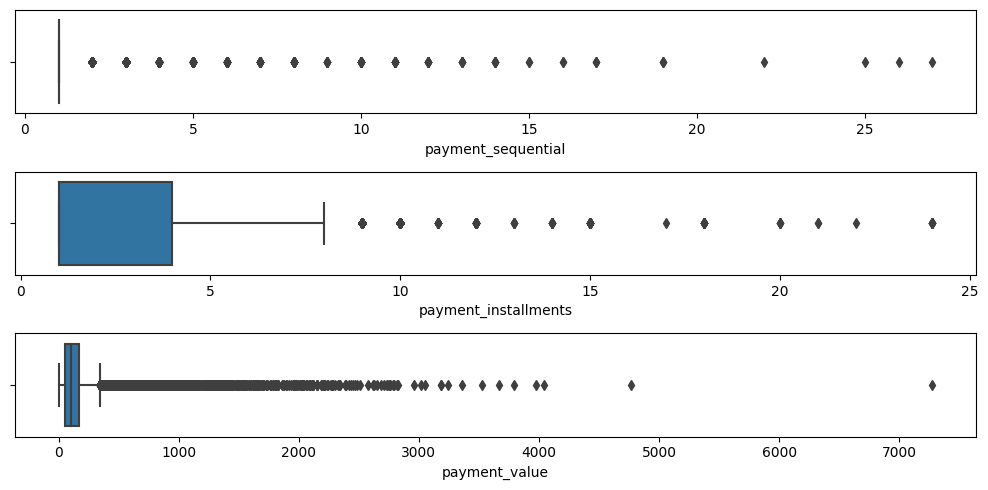

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

sns.boxplot(
    x=data['payment_sequential'],
    ax=axs[0]
)

sns.boxplot(
    x=data['payment_installments'],
    ax=axs[1]
)

sns.boxplot(
    x=data['payment_value'],
    ax=axs[2]
)

plt.tight_layout()
plt.show()

> The boxplots above confirm that the data has positive skewness

### data correlation

In [20]:
data.corr(numeric_only=True)

,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086536,-0.071077
payment_installments,-0.086536,1.000000,0.341629
payment_value,-0.071077,0.341629,1.000000


> Data correlation shows that there's no high correlation between columns, but there's a `slight positive correlation between payment_installment and payment_value`

### data grouping by `payment type`

In [21]:
data.groupby('payment_type').agg(
    payment_sequential_mean = pd.NamedAgg(column='payment_sequential',
                                           aggfunc='mean'),
    payment_installment_mean = pd.NamedAgg(column='payment_installments',
                                            aggfunc='mean'),
    payment_value_mean = pd.NamedAgg(column='payment_value',
                                      aggfunc='mean'),
    payment_value_highest = pd.NamedAgg(column='payment_value',
                                      aggfunc='max'),
    freq = pd.NamedAgg(column='payment_value',
                       aggfunc='count')
).sort_values(by=['payment_value_mean'], ascending=False)

,payment_sequential_mean,payment_installment_mean,payment_value_mean,payment_value_highest,freq
payment_type,,,,,
credit_card,1.004669,3.506861,164.026334,4764.34,28059
boleto,1.000000,1.000000,143.502489,7274.88,7068
debit_card,1.029466,1.000000,140.864936,2512.53,543
voucher,2.571076,1.000000,65.138302,1302.42,2026
cred,1.000000,NaN,NaN,NaN,0


> The aggregate table confirm that credit card is the highest contributor of payment value



## Visualization & Explanatory Analysis

### Pertanyaan 1: what is the most used payment type?

In [22]:
payment_type_freq = data[['payment_type']].groupby('payment_type').value_counts().to_frame(name='freq').sort_values(by=['freq'], ascending=False)

In [23]:
payment_type_freq

,freq
payment_type,
credit_card,28059
boleto,7068
voucher,2026
debit_card,543
cred,1


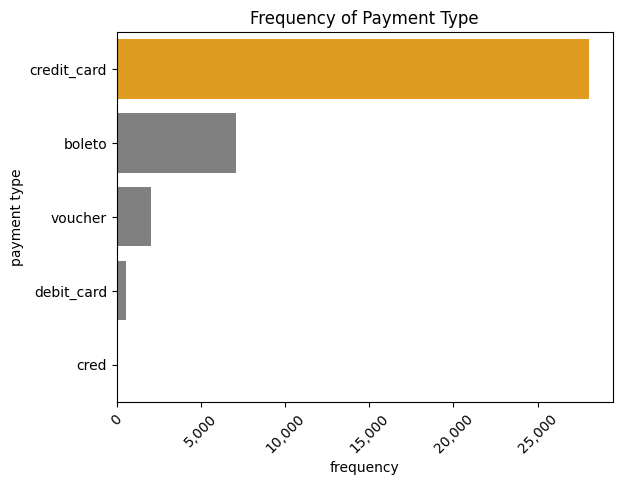

In [24]:
col_colors = ['grey' if(freq < max(payment_type_freq['freq'])) else 'orange' for freq in payment_type_freq['freq']]

ax = sns.barplot(
    data=payment_type_freq,
    x='freq',
    y=payment_type_freq.index,
    orient='h',
    palette=col_colors)

ax.set(
    title='Frequency of Payment Type',
    xlabel='frequency',
    ylabel='payment type'
)

ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

> Credit card is the most used payment type with 70% transactions frequency.

### Pertanyaan 2: how much payment value has been processed for each payment type?

In [25]:
payment_sum_by_type = data.groupby('payment_type').agg(
    payment_sum = pd.NamedAgg(column='payment_value',
                              aggfunc='sum')
).sort_values(by=['payment_sum'], ascending=False)

In [26]:
payment_sum_by_type

,payment_sum
payment_type,
credit_card,4602414.90
boleto,1014275.59
voucher,131970.20
debit_card,76489.66
cred,0.00


In [36]:
payment_sum_by_type.sum()['payment_sum']

5825150.350000001

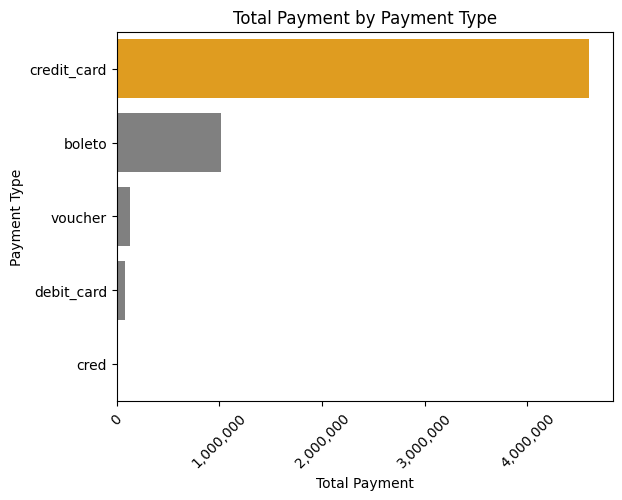

In [28]:
col_colors = ['gray' if(sum < max(payment_sum_by_type['payment_sum'])) else 'orange' for sum in payment_sum_by_type['payment_sum']]

ax = sns.barplot(data=payment_sum_by_type,
                 x='payment_sum',
                 y=payment_sum_by_type.index,
                 palette=col_colors)

ax.set(
    title='Total Payment by Payment Type',
    xlabel='Total Payment',
    ylabel='Payment Type'
)

ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

> Credit card holds the most payment value by 78%, over 12 millions

### Pertanyaan 3: how is the distribution of payment type on payment value vs payment installment?

In [29]:
installment_and_value_by_type = data.loc[:, ['payment_installments', 'payment_value', 'payment_type']]

In [30]:
installment_and_value_by_type

,payment_installments,payment_value,payment_type
0,8.0,99.33,credit_card
1,1.0,24.39,credit_card
2,1.0,65.71,credit_card
3,8.0,107.78,credit_card
4,2.0,128.45,credit_card
...,...,...,...
37692,1.0,287.96,credit_card
37693,1.0,156.24,boleto
37694,4.0,179.04,credit_card
37695,1.0,124.62,boleto


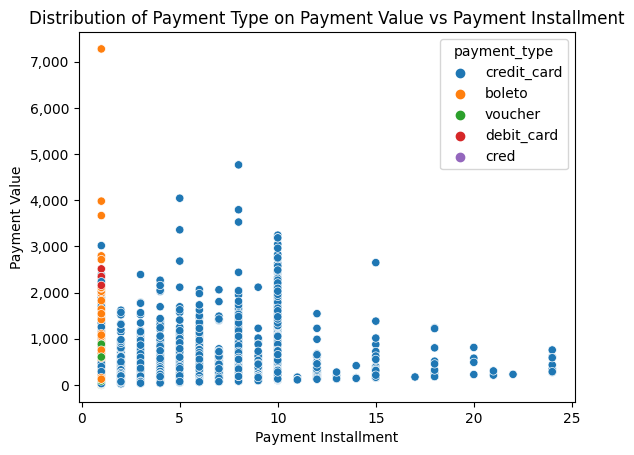

In [31]:
ax = sns.scatterplot(
    data=installment_and_value_by_type,
    x='payment_installments',
    y='payment_value',
    hue='payment_type'
)

ax.set(
    title='Distribution of Payment Type on Payment Value vs Payment Installment',
    xlabel='Payment Installment',
    ylabel='Payment Value'
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

The payment type distribution on payment value vs payment installment shows some interesting informations:
- The distribution of payment using credit card has positive skewness and the range is from 0 -24. The payment installment using credit card centered in 5 - 10.
- There's a extreme payment value done using credit card with 1 installment with value 14,000.
- The other payment categories are lie on first installment. Among these 4 payment categories, buleto has several transactions with value from 6,000 - ~7,800

## Conclusion

- Conclution pertanyaan 1: Credit card is the most used payment type with 70% transactions frequency.

- Conclution pertanyaan 2: Credit card holds the most payment value by 78%, over 12 millions

- Conclution pertanyaan 3:
  - The payment type distribution on payment value vs payment installment shows some interesting informations:
  - The distribution of payment using credit card has positive skewness and the range is from 0 -24. The payment installment using credit card centered in 5 - 10.
  - There's a extreme payment value done using credit card with 1 installment with value 14,000.
  - The other payment categories are lie on first installment. Among these 4 payment categories, buleto has several transactions with value from 6,000 - ~7,800